1. Import Library

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import drive


2.Load Dataset

In [ ]:
data = pd.read_csv( "/content/drive/MyDrive/Project TIA House Prediksi /results_cleaned.csv")
data.head(5)

,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area,building_area (m2)
0,Rumah 2 Lantai Bagus Sertifikat Hak Milik di M...,"Andir, Bandung",3,2,2,2100000000,137,170
1,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,4100000000,202,300
2,Jual Cepat Rumah di Maleber Rajawali Bisa Untu...,"Andir, Bandung",5,2,1,3300000000,350,258
3,Rumah minimalis 3 lantai di andir Bandung coco...,"Andir, Bandung",2,2,1,580000000,30,80
4,Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...,"Andir, Bandung",11,3,0,1300000000,176,176


3. Data Understanding


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7609 entries, 0 to 7608
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   house_name          7609 non-null   object
 1   location            7609 non-null   object
 2   bedroom_count       7609 non-null   int64 
 3   bathroom_count      7609 non-null   int64 
 4   carport_count       7609 non-null   int64 
 5   price               7609 non-null   int64 
 6   land_area           7609 non-null   int64 
 7   building_area (m2)  7609 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 475.7+ KB


In [ ]:
jumlah_baris = len(data)
print (f'Jumlah Data: {jumlah_baris}')

Jumlah Data: 7609


4. Eksplorasi Data (EDA)

In [ ]:
print(data.describe())

       bedroom_count  bathroom_count  carport_count         price  \
count    7609.000000     7609.000000    7609.000000  7.609000e+03   
mean        4.476935        3.196478       1.374688  4.981947e+09   
std         4.712505        4.104819       1.928083  1.476257e+10   
min         0.000000        0.000000       0.000000  1.200000e+07   
25%         3.000000        2.000000       0.000000  1.150000e+09   
50%         4.000000        3.000000       1.000000  2.250000e+09   
75%         5.000000        3.000000       2.000000  4.750000e+09   
max        99.000000       99.000000      40.000000  7.350000e+11   

          land_area  building_area (m2)  
count   7609.000000        7.609000e+03  
mean     274.553949        6.424599e+02  
std      440.553799        3.445898e+04  
min        6.000000       -2.500000e+02  
25%      102.000000        1.000000e+02  
50%      165.000000        1.800000e+02  
75%      313.000000        3.000000e+02  
max    11850.000000        3.006000e+06  


In [ ]:
print("\nJumlah data yang hilang:")
print(data.isnull().sum ())


Jumlah data yang hilang:
house_name            0
location              0
bedroom_count         0
bathroom_count        0
carport_count         0
price                 0
land_area             0
building_area (m2)    0
dtype: int64


In [ ]:
# Analisis kolom kategorikal
print(data['location'].value_counts())

location
Bojongloa Kidul, Bandung     418
Mandalajati, Bandung         380
Cicendo, Bandung             379
Arcamanik, Bandung           361
Cibiru, Bandung              361
Andir, Bandung               360
Lengkong, Bandung            342
Astanaanyar, Bandung         342
Buah Batu, Bandung           323
Babakanciparay, Bandung      323
Bandung Wetan, Bandung       323
Batununggal, Bandung         323
Cidadap, Bandung             311
Bandung Kidul, Bandung       253
Sumurbandung, Bandung        247
Regol, Bandung               247
Rancasari, Bandung           247
Antapani, Bandung            247
Kiaracondong, Bandung        228
Bandung Kulon, Bandung       228
Ujungberung, Bandung         228
Sukasari, Bandung            209
Panyileukan, Bandung         207
Gede Bage, Bandung           190
Coblong, Bandung             190
Sukajadi, Bandung            190
Cibeunying Kidul, Bandung    152
Name: count, dtype: int64


5. Visualization & Pembersihan Dataset

 5.1 Menghitung rata-rata harga rumah berdasarkan lokasi

                     location         price
7      Bandung Wetan, Bandung  1.740116e+10
15           Coblong, Bandung  1.499218e+10
25      Sumurbandung, Bandung  1.386184e+10
13           Cicendo, Bandung  8.591137e+09
14           Cidadap, Bandung  8.045238e+09
5      Bandung Kidul, Bandung  7.184383e+09
23          Sukajadi, Bandung  6.982842e+09
24          Sukasari, Bandung  6.069000e+09
18          Lengkong, Bandung  5.509848e+09
8        Batununggal, Bandung  4.589783e+09
9    Bojongloa Kidul, Bandung  4.327189e+09
0              Andir, Bandung  3.587400e+09
4     Babakanciparay, Bandung  3.329963e+09
22             Regol, Bandung  3.326328e+09
3        Astanaanyar, Bandung  3.174860e+09
12            Cibiru, Bandung  3.073371e+09
11  Cibeunying Kidul, Bandung  2.683428e+09
17      Kiaracondong, Bandung  2.655651e+09
10         Buah Batu, Bandung  2.641198e+09
6      Bandung Kulon, Bandung  2.221899e+09
16         Gede Bage, Bandung  2.059095e+09
1           Antapani, Bandung  1

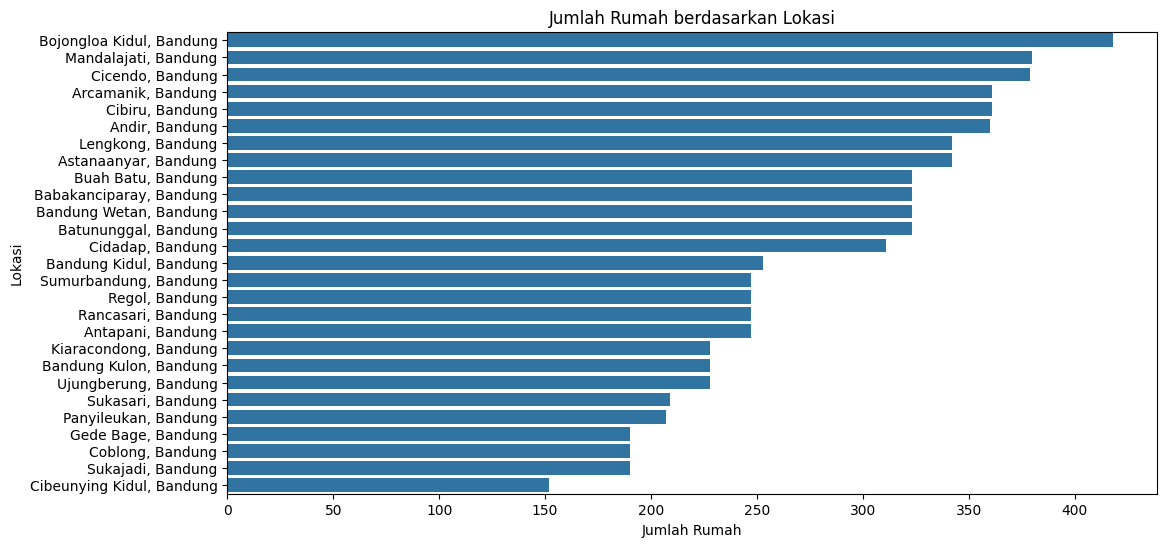

In [ ]:
avg_price_by_location = data.groupby('location')['price'].mean().reset_index()
avg_price_by_location = avg_price_by_location.sort_values(by='price', ascending=False)
print(avg_price_by_location)

#visualisasi
plt.figure(figsize=(12, 6))
sns.countplot(y='location', data=data, order=data['location'].value_counts().index)
plt.title('Jumlah Rumah berdasarkan Lokasi')
plt.xlabel('Jumlah Rumah')
plt.ylabel('Lokasi')
plt.show()

#Lokasi Bojongloa Kidul, Bandung memiliki jumlah perumahan terbanyak dengan kisaran harga 4 M

5.2 Analisis Distribusi Harga Rumah

price
2500000000    177
1500000000    156
3500000000    144
1200000000    133
1300000000    132
             ... 
295000000       1
199000000       1
280000000       1
662000000       1
4890000000      1
Name: count, Length: 685, dtype: int64


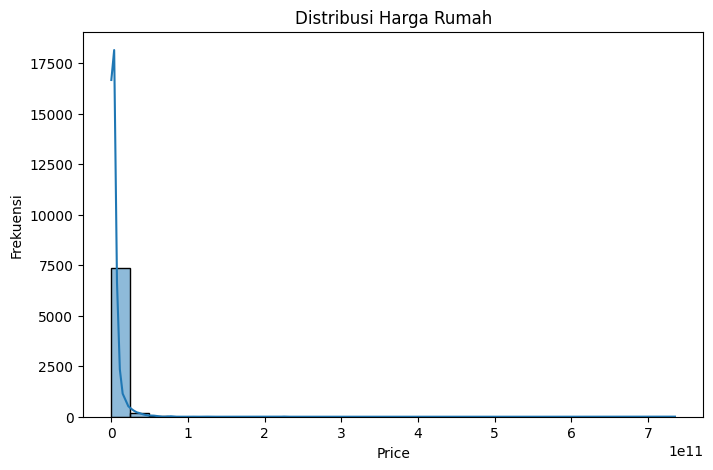

In [ ]:
# Analisis harga
print(data['price'].value_counts())
# Visualisasi distribusi harga rumah
plt.figure(figsize=(8, 5))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Price')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
# Menghitung IQR
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan bawah
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi outlier
outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
                                             house_name  \
29    Jual Rumah Luas Dan Strategis Mainroad Rajawal...   
31           Rumah Lama di Rajawali Dekat Telkom Dan Rs   
59    Rumah Kawasan Ramai Cocok Untuk Usaha di Kebon...   
68    Liat Aja Sendiri Beli Rumah Keren Komplek Biof...   
77               Rumah Besar Tengah Kota Sayap Sudirman   
...                                                 ...   
7531           Dijual Rumah Besar Bagus di Taman Sakura   
7541     Rumah Mewah di Jalan Terusan Pasirkoja Bandung   
7586  Rumah Mewah 2 Lantai Komplek Taman Sakura Prat...   
7594   Rumah Lux Terawat di Taman Sakura Raya , Bandung   
7604   Rumah Lux Terawat di Taman Sakura Raya , Bandung   

                     location  bedroom_count  bathroom_count  carport_count  \
29             Andir, Bandung              9               3              6   
31             Andir, Bandung              9               3              3   
59             Andir, Bandung              0

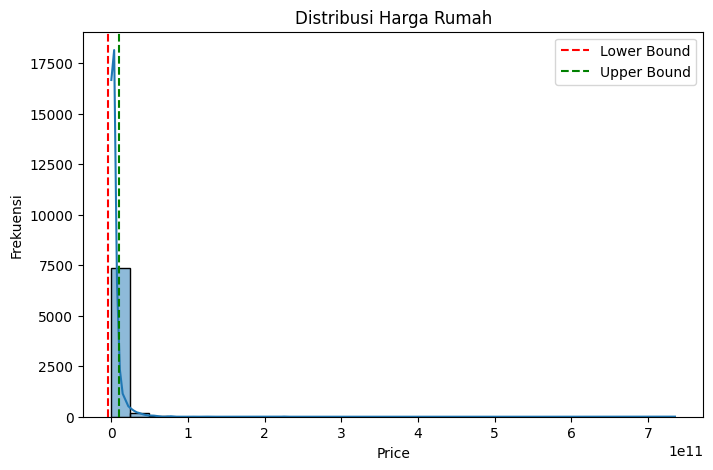

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['price'], bins=30, kde=True)
plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(x=upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title('Distribusi Harga Rumah')
plt.xlabel('Price')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

count    7.609000e+03
mean     4.981947e+09
std      1.476257e+10
min      1.200000e+07
25%      1.150000e+09
50%      2.250000e+09
75%      4.750000e+09
max      7.350000e+11
Name: price, dtype: float64


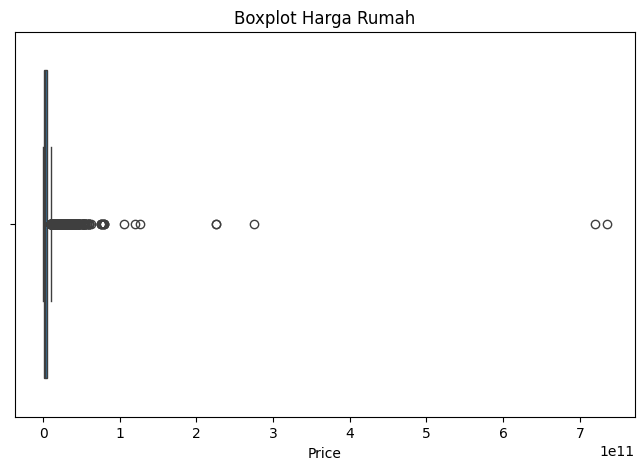

In [ ]:
# Menghitung statistik deskriptif
price_stats = data['price'].describe()
print(price_stats)
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['price'])
plt.title('Boxplot Harga Rumah')
plt.xlabel('Price')
plt.show()

Outlier dapat mempengaruhi estimasi parameter model, menyebabkan model menjadi bias dan tidak akurat.
Outlier dapat menyebabkan distribusi target (misalnya, harga rumah) menjadi tidak normal, yang dapat mempengaruhi asumsi dasar dari banyak algoritma pembelajaran mesin

In [ ]:
# Menghapus outlier
#Membuat DataFrame Baru (clenaed)
df= data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]

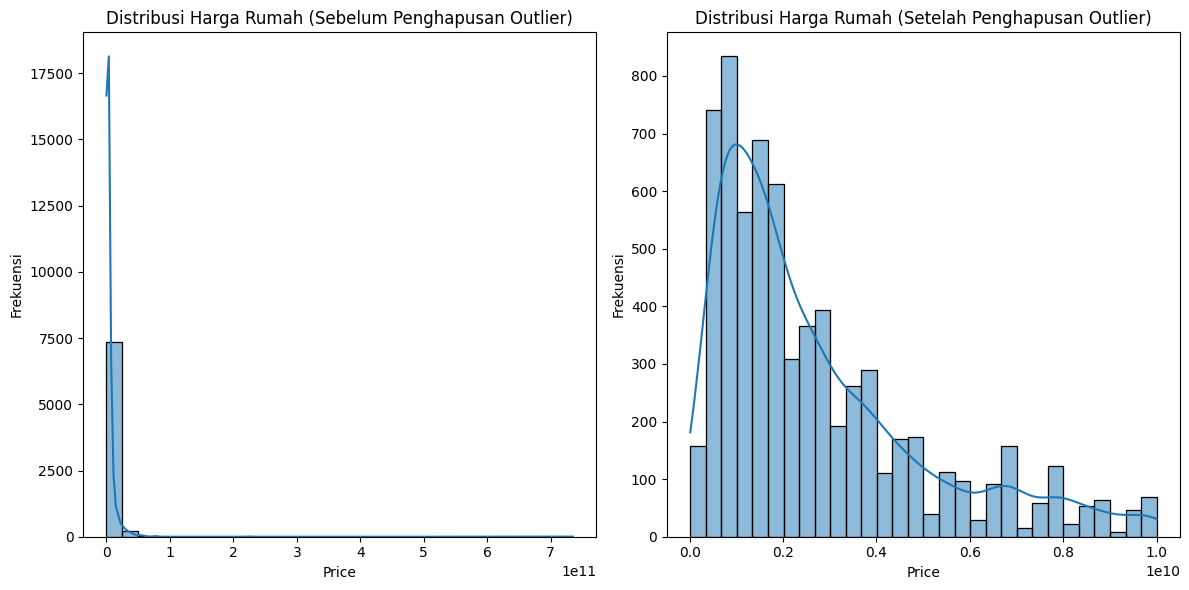

In [ ]:
# Visualisasi distribusi harga sebelum penghapusan outlier
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribusi Harga Rumah (Sebelum Penghapusan Outlier)')
plt.xlabel('Price')
plt.ylabel('Frekuensi')

# Visualisasi distribusi harga setelah penghapusan outlier
plt.subplot(1, 2, 2)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribusi Harga Rumah (Setelah Penghapusan Outlier)')
plt.xlabel('Price')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

5.3 Hubungan Jumlah kamar tidur dengan harga

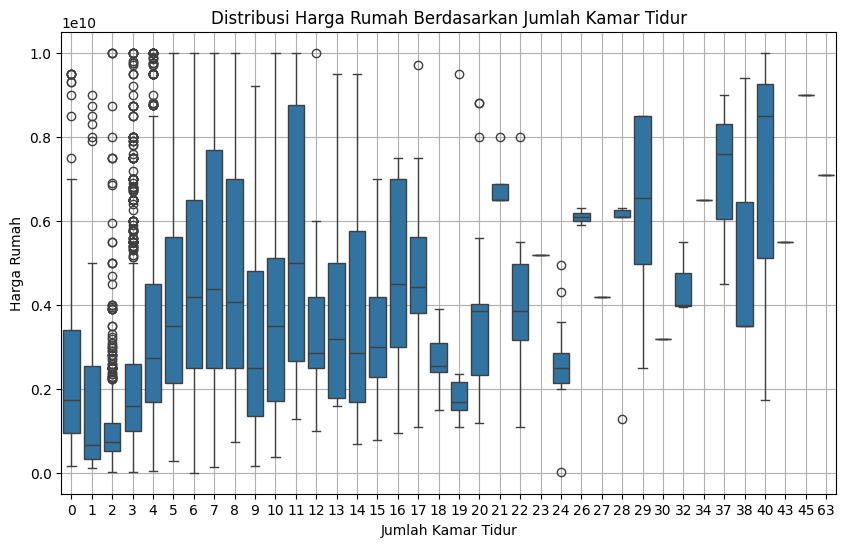

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bedroom_count', y='price')
plt.title('Distribusi Harga Rumah Berdasarkan Jumlah Kamar Tidur')
plt.xlabel('Jumlah Kamar Tidur')
plt.ylabel('Harga Rumah')
plt.grid(True)
plt.show()

In [ ]:
print(df.columns)

Index(['house_name', 'location', 'bedroom_count', 'bathroom_count',
       'carport_count', 'price', 'land_area', 'building_area (m2)'],
      dtype='object')


5.4. Hubungan Luas Tanah dengan Harga rumah

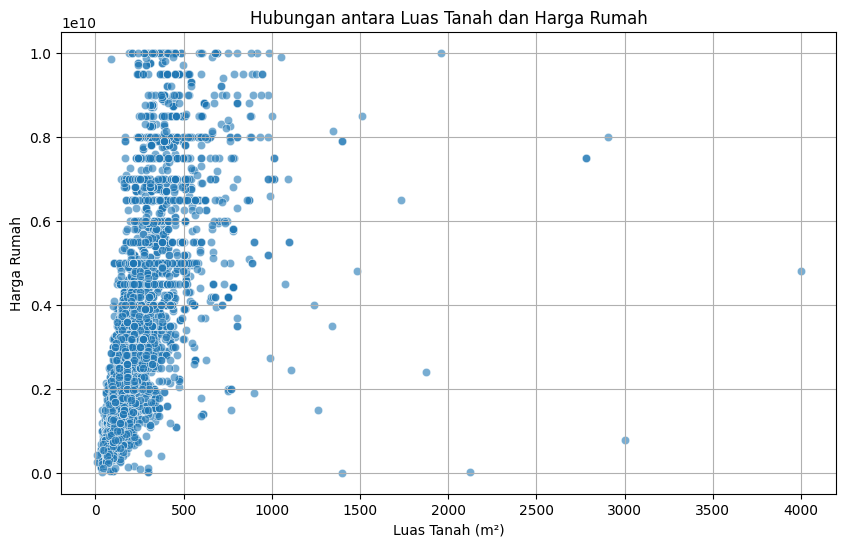

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='land_area', y='price', alpha=0.6)
plt.title('Hubungan antara Luas Tanah dan Harga Rumah')
plt.xlabel('Luas Tanah (m²)')
plt.ylabel('Harga Rumah')
plt.grid(True)
plt.show()

5.5 Histogram

array([[<Axes: title={'center': 'bedroom_count'}>,
        <Axes: title={'center': 'bathroom_count'}>],
       [<Axes: title={'center': 'carport_count'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'land_area'}>,
        <Axes: title={'center': 'building_area (m2)'}>]], dtype=object)

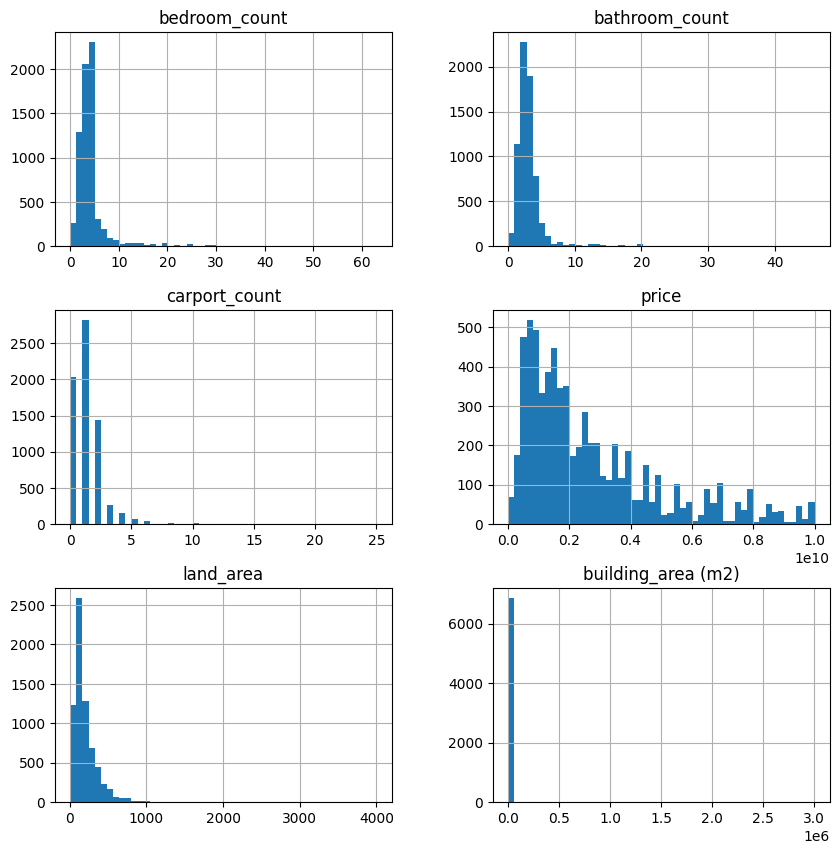

In [ ]:
df.hist(bins=50, figsize=(10, 10))

5.6 Melihat Persebaran Data pada feature luas bangunan

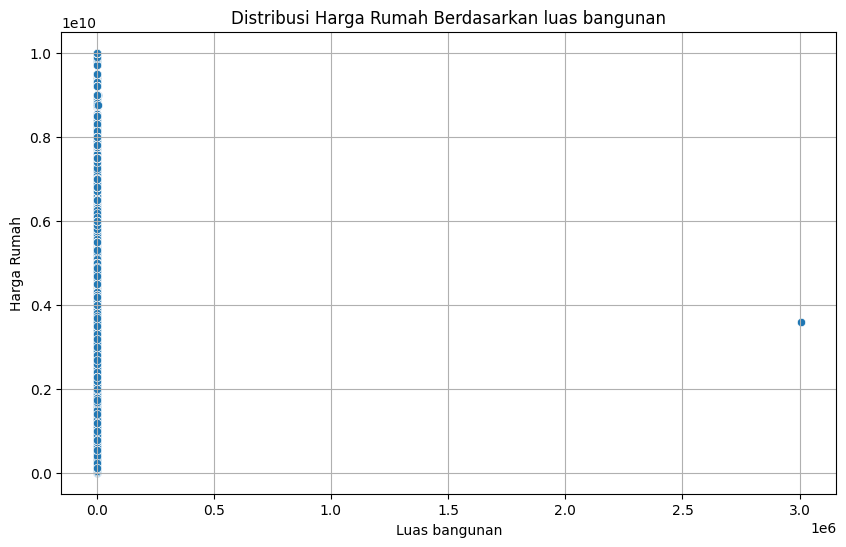

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='building_area (m2)', y='price')
plt.title('Distribusi Harga Rumah Berdasarkan luas bangunan')
plt.xlabel('Luas bangunan')
plt.ylabel('Harga Rumah')
plt.grid(True)
plt.show()

In [ ]:
print(df['building_area (m2)'].value_counts())

building_area (m2)
200    359
300    317
120    262
150    261
100    256
      ... 
475      1
143      1
309      1
754      1
624      1
Name: count, Length: 394, dtype: int64


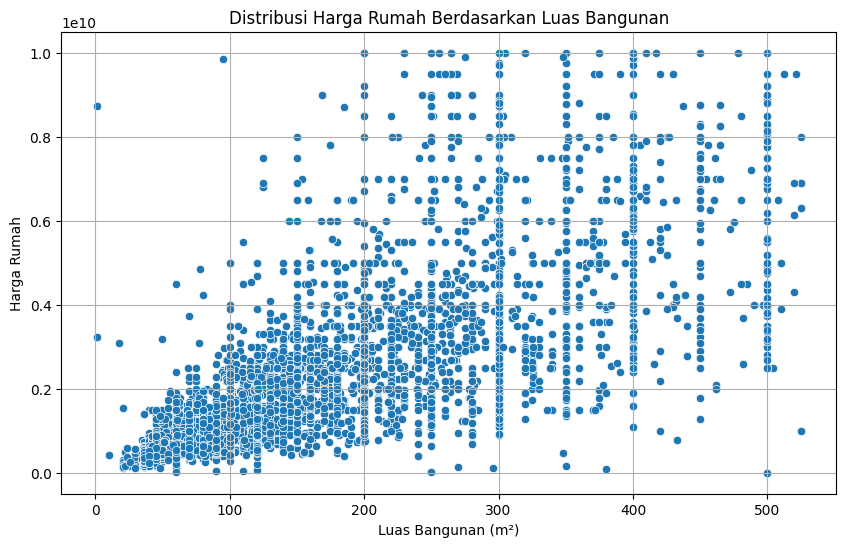

In [ ]:
# Menghitung Q1 dan Q3 untuk building_area
Q1 = df['building_area (m2)'].quantile(0.25)
Q3 = df['building_area (m2)'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier
#Membuat DataFrame baru
df_cleaned = df[(df['building_area (m2)'] >= lower_bound) & (df['building_area (m2)'] <= upper_bound)]

# Visualisasi setelah menghapus outlier
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='building_area (m2)', y='price')
plt.title('Distribusi Harga Rumah Berdasarkan Luas Bangunan')
plt.xlabel('Luas Bangunan (m²)')
plt.ylabel('Harga Rumah')
plt.grid(True)
plt.show()

array([[<Axes: title={'center': 'bedroom_count'}>,
        <Axes: title={'center': 'bathroom_count'}>],
       [<Axes: title={'center': 'carport_count'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'land_area'}>,
        <Axes: title={'center': 'building_area (m2)'}>]], dtype=object)

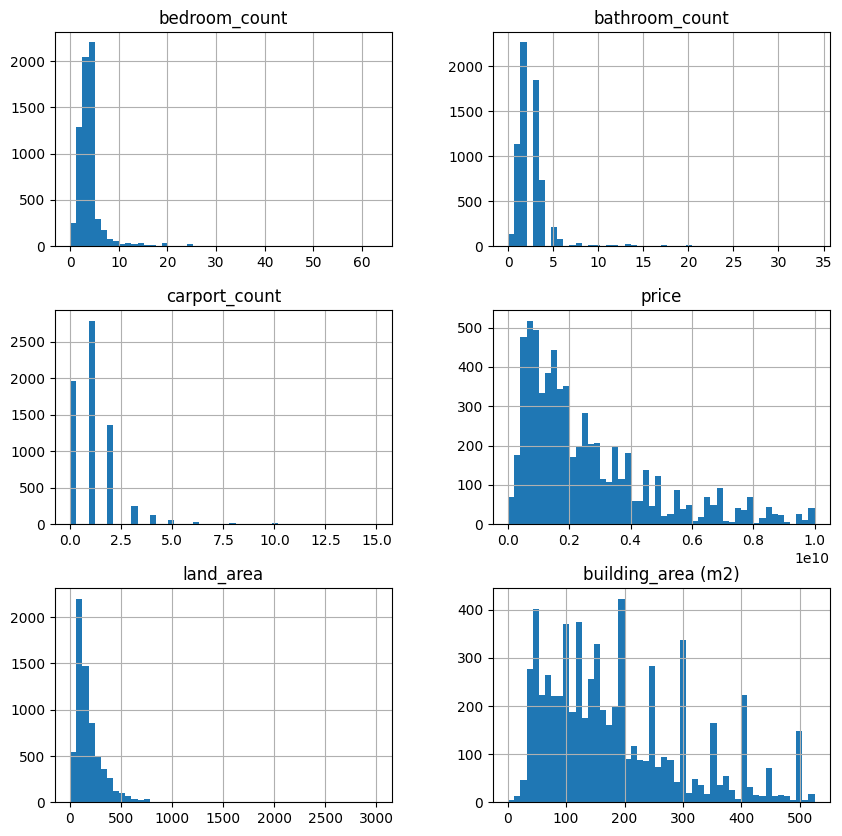

In [ ]:
#Histogram ke 2
df_cleaned.hist(bins=50, figsize=(10, 10))

5.7 Melihat Hubungan Carport terhadap harga

carport_count
1     2816
0     2032
2     1439
3      259
4      151
5       68
6       40
8       15
10      15
7        5
15       2
13       2
9        1
11       1
25       1
20       1
Name: count, dtype: int64


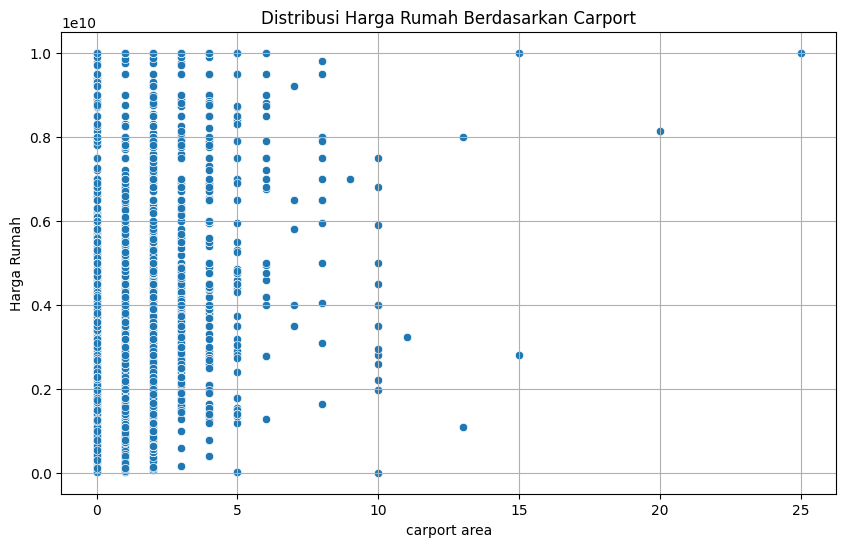

In [ ]:
print(df['carport_count'].value_counts())
#visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carport_count', y='price')
plt.title('Distribusi Harga Rumah Berdasarkan Carport')
plt.xlabel('carport area')
plt.ylabel('Harga Rumah')
plt.grid(True)
plt.show()

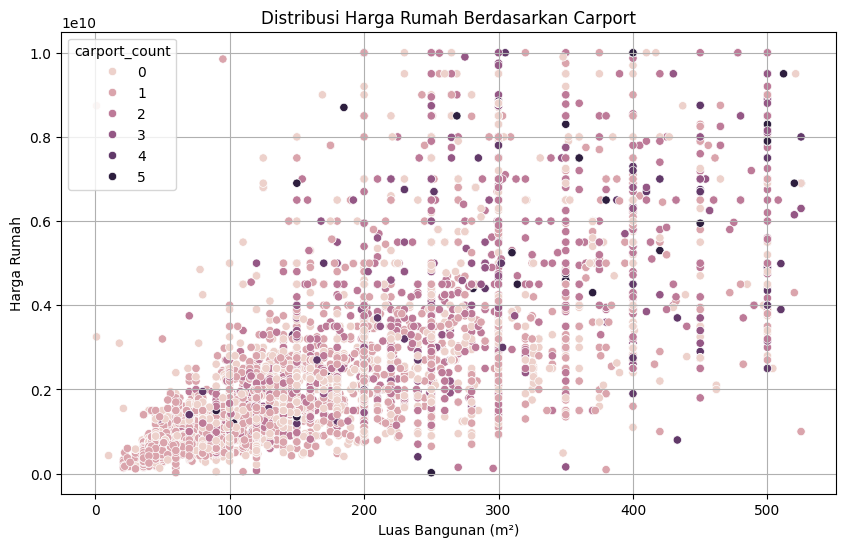

In [ ]:
# Menghitung Q1 dan Q3 untuk carport_count
Q1 = df['carport_count'].quantile(0.25)
Q3 = df['carport_count'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier carport
data_cleaned = df[(df_cleaned['carport_count'] >= lower_bound) & (df['carport_count'] <= upper_bound)]

# Visualisasi setelah menghapus outlier
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='building_area (m2)', y='price', hue='carport_count')
plt.title('Distribusi Harga Rumah Berdasarkan Carport')
plt.xlabel('Luas Bangunan (m²)')
plt.ylabel('Harga Rumah')
plt.grid(True)
plt.show()

array([[<Axes: title={'center': 'bedroom_count'}>,
        <Axes: title={'center': 'bathroom_count'}>],
       [<Axes: title={'center': 'carport_count'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'land_area'}>,
        <Axes: title={'center': 'building_area (m2)'}>]], dtype=object)

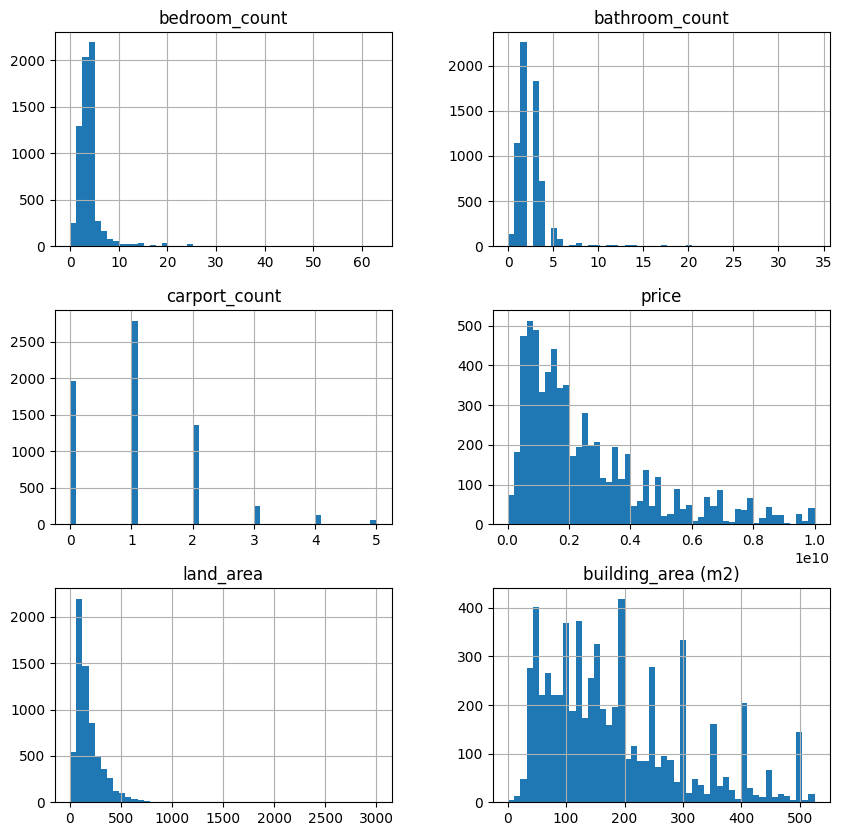

In [ ]:
#Histogram final
data_cleaned.hist(bins=50, figsize=(10, 10))

In [ ]:
#Perbandingan Data sebelum dan sesudah pembersihan
jumlah_baris_sebelum_pembersihan = len(data)
print (f'Jumlah Data: {jumlah_baris_sebelum_pembersihan}')

jumlah_baris_setelah_pembersihan = len(data_cleaned)
print (f'Jumlah Data: {jumlah_baris_setelah_pembersihan}')

Jumlah Data: 7609
Jumlah Data: 6542


5.7 Korelasi

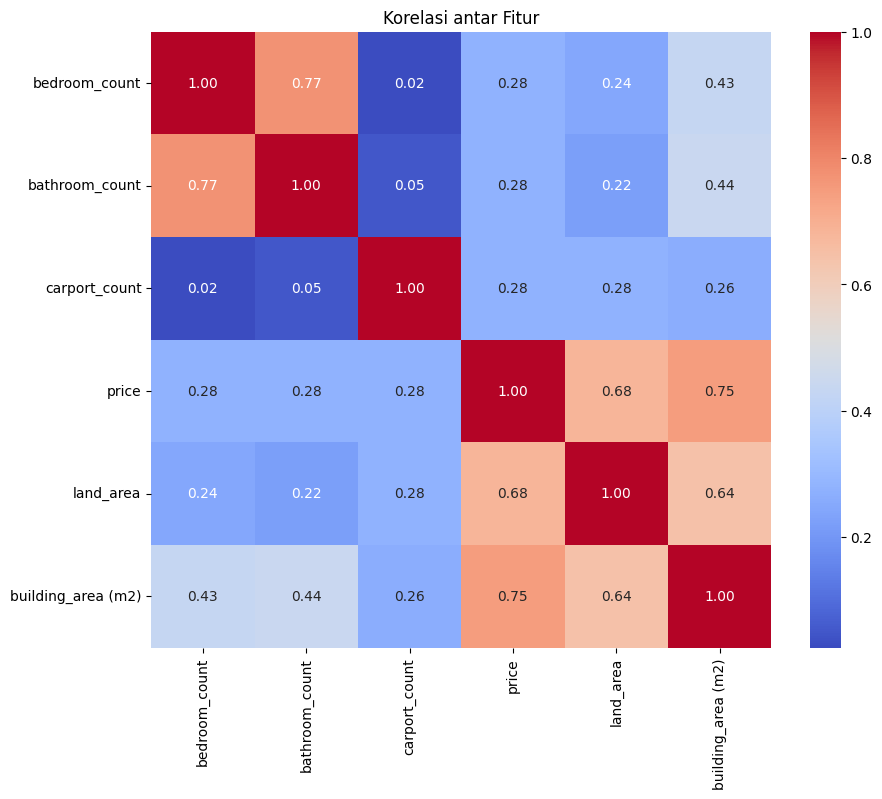

In [ ]:
numeric_df = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Membuat heatmap korelasi antar fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Korelasi antar Fitur')
plt.show()

7. Pre Processing Data

In [ ]:
# Memeriksa nilai unik sebelum encoding
print("Unique locations before encoding:", data_cleaned['location'].unique())

Unique locations before encoding: ['Andir, Bandung' 'Astanaanyar, Bandung' 'Antapani, Bandung'
 'Arcamanik, Bandung' 'Bandung Kidul, Bandung' 'Bandung Kulon, Bandung'
 'Bandung Wetan, Bandung' 'Batununggal, Bandung'
 'Bojongloa Kidul, Bandung' 'Buah Batu, Bandung'
 'Cibeunying Kidul, Bandung' 'Cibiru, Bandung' 'Cicendo, Bandung'
 'Cidadap, Bandung' 'Coblong, Bandung' 'Gede Bage, Bandung'
 'Kiaracondong, Bandung' 'Lengkong, Bandung' 'Mandalajati, Bandung'
 'Panyileukan, Bandung' 'Rancasari, Bandung' 'Regol, Bandung'
 'Sukajadi, Bandung' 'Sukasari, Bandung' 'Sumurbandung, Bandung'
 'Ujungberung, Bandung' 'Babakanciparay, Bandung']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode kolom location
le = LabelEncoder()
data_cleaned['location_encoded'] = le.fit_transform(data_cleaned['location'])
data_cleaned

<ipython-input-33-b70591c47320>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['location_encoded'] = le.fit_transform(data_cleaned['location'])


,house_name,location,bedroom_count,bathroom_count,carport_count,price,land_area,building_area (m2),location_encoded
0,Rumah 2 Lantai Bagus Sertifikat Hak Milik di M...,"Andir, Bandung",3,2,2,2100000000,137,170,0
1,Rumah Cantik @ Andir (Sudirman),"Andir, Bandung",3,2,3,4100000000,202,300,0
2,Jual Cepat Rumah di Maleber Rajawali Bisa Untu...,"Andir, Bandung",5,2,1,3300000000,350,258,0
3,Rumah minimalis 3 lantai di andir Bandung coco...,"Andir, Bandung",2,2,1,580000000,30,80,0
4,Jual Rumah Murah Bisa Dijadikan Kos”an Di Jala...,"Andir, Bandung",11,3,0,1300000000,176,176,0
...,...,...,...,...,...,...,...,...,...
7602,Rumah Strategis Banget di Babakan Ciparay,"Babakanciparay, Bandung",3,2,1,800000000,128,111,4
7603,Rumah Bangunan Lama Kondisi Terawat di Ciboler...,"Babakanciparay, Bandung",3,2,0,780000000,110,90,4
7606,Rumah Besar Elegant Asri Nyaman Sumbersari Ban...,"Babakanciparay, Bandung",6,3,3,5500000000,375,290,4
7607,Rumah strategis nyaman belakang mall sumber sa...,"Babakanciparay, Bandung",5,3,3,4890000000,375,290,4


In [ ]:
# Melihat mapping dari kategori ke nilai yang di-encode
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'Andir, Bandung': 0, 'Antapani, Bandung': 1, 'Arcamanik, Bandung': 2, 'Astanaanyar, Bandung': 3, 'Babakanciparay, Bandung': 4, 'Bandung Kidul, Bandung': 5, 'Bandung Kulon, Bandung': 6, 'Bandung Wetan, Bandung': 7, 'Batununggal, Bandung': 8, 'Bojongloa Kidul, Bandung': 9, 'Buah Batu, Bandung': 10, 'Cibeunying Kidul, Bandung': 11, 'Cibiru, Bandung': 12, 'Cicendo, Bandung': 13, 'Cidadap, Bandung': 14, 'Coblong, Bandung': 15, 'Gede Bage, Bandung': 16, 'Kiaracondong, Bandung': 17, 'Lengkong, Bandung': 18, 'Mandalajati, Bandung': 19, 'Panyileukan, Bandung': 20, 'Rancasari, Bandung': 21, 'Regol, Bandung': 22, 'Sukajadi, Bandung': 23, 'Sukasari, Bandung': 24, 'Sumurbandung, Bandung': 25, 'Ujungberung, Bandung': 26}


Andir, Bandung: 0
Antapani, Bandung': 1
Arcamanik, Bandung': 2
Astanaanyar, Bandung': 3
Babakanciparay, Bandung': 4
Bandung Kidul, Bandung: 5
Bandung Kulon, Bandung': 6
Bandung Wetan, Bandung': 7
Batununggal, Bandung': 8
Bojongloa Kidul, Bandung': 9
Buah Batu, Bandung': 10
Cibeunying Kidul, Bandung': 11
Cibiru, Bandung': 12
Cicendo, Bandung': 13
Cidadap, Bandung': 14
Coblong, Bandung': 15
Gede Bage, Bandung': 16
Kiaracondong, Bandung': 17
Lengkong, Bandung': 18
Mandalajati, Bandung': 19
Panyileukan, Bandung': 20
Rancasari, Bandung': 21
Regol, Bandung': 22
Sukajadi, Bandung': 23
Sukasari, Bandung': 24
Sumurbandung, Bandung': 25
Ujungberung, Bandung': 26

In [ ]:
# Mengganti nama kolom yang memiliki spasi atau karakter lain
data_cleaned.rename(columns=lambda x: x.replace(" ", "_").replace(",", "").replace("(", "").replace(")", ""), inplace=True)
# Memeriksa kolom yang ada dalam DataFrame setelah mengganti nama
print("Kolom yang ada dalam DataFrame setelah mengganti nama:", data_cleaned.columns)

Kolom yang ada dalam DataFrame setelah mengganti nama: Index(['house_name', 'location', 'bedroom_count', 'bathroom_count',
       'carport_count', 'price', 'land_area', 'building_area_m2',
       'location_encoded'],
      dtype='object')


<ipython-input-34-8001df0217c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.rename(columns=lambda x: x.replace(" ", "_").replace(",", "").replace("(", "").replace(")", ""), inplace=True)


In [ ]:
print(data_cleaned.dtypes)

house_name          object
location            object
bedroom_count        int64
bathroom_count       int64
carport_count        int64
price                int64
land_area            int64
building_area_m2     int64
location_encoded     int64
dtype: object


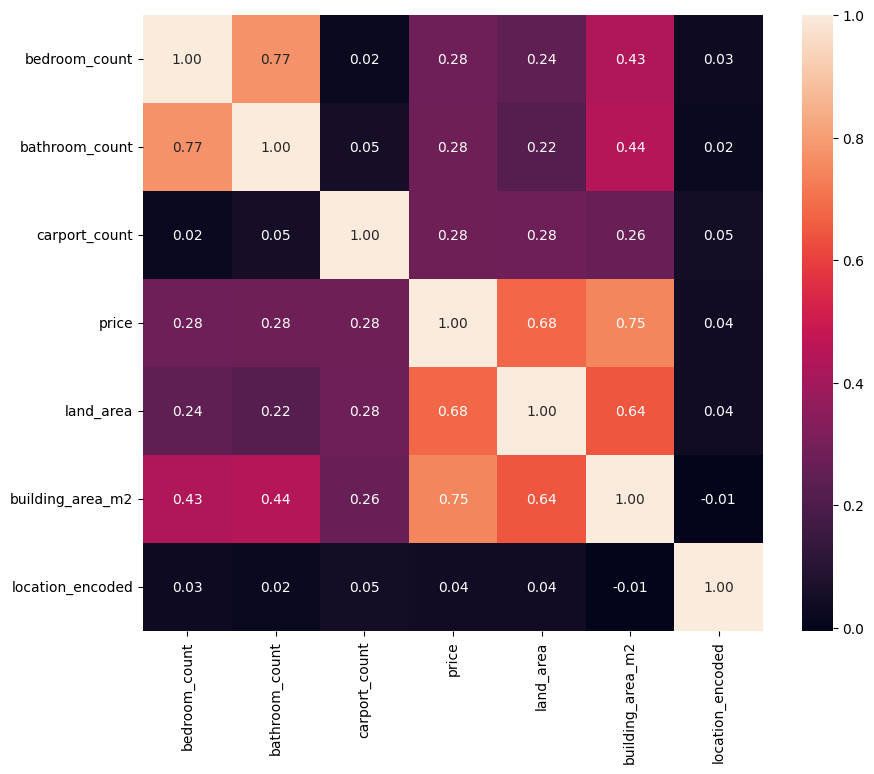

In [ ]:
#KORELASI
correlation_matrix = data_cleaned.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

Hal ini menunjukan luas lahan & luas bangunan memiliki pengaruh yang terbesar terhadap harga properti, kemudian ada jumlah kamar mandi

7.1 Normalisasi

In [ ]:
from sklearn.preprocessing import StandardScaler

# memilih fitur untuk model
features = ['bedroom_count', 'bathroom_count', 'carport_count', 'land_area', 'building_area_m2', 'location_encoded']
X = data_cleaned[features]

# Target
y = data_cleaned['price']

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X

,bedroom_count,bathroom_count,carport_count,land_area,building_area_m2,location_encoded
0,3,2,2,137,170,0
1,3,2,3,202,300,0
2,5,2,1,350,258,0
3,2,2,1,30,80,0
4,11,3,0,176,176,0
...,...,...,...,...,...,...
7602,3,2,1,128,111,4
7603,3,2,0,110,90,4
7606,6,3,3,375,290,4
7607,5,3,3,375,290,4


In [ ]:
y

,price
0,2100000000
1,4100000000
2,3300000000
3,580000000
4,1300000000
...,...
7602,800000000
7603,780000000
7606,5500000000
7607,4890000000


8. Modeling

In [ ]:
8.1 Linier Regression

In [ ]:
#Split Dataset ( membagi data menjadi data latih dan uji)
from sklearn.model_selection import train_test_split

# Membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#Melatih model
from sklearn.linear_model import LinearRegression
# Inisialisasi model
lr_model = LinearRegression()

In [ ]:
# Latih model
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prediksi LinierRegression
y_pred_lr = lr_model.predict(X_test)

8.2 Random Forest

In [121]:
# Inisialisasi model
rf_model = RandomForestRegressor(random_state=42)

In [122]:
# Latih model Random forest
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Prediksi
y_pred_rf = rf_model.predict(X_test)

9. Evaluasi Model

In [ ]:
# Evaluasi Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
# Evaluasi Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, R²: {r2_rf}")

print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, R²: {r2_lr}")

Random Forest - MAE: 499716518.0655308, MSE: 8.153703387860622e+17, R²: 0.8190558639382046
Linear Regression - MAE: 812587275.3223966, MSE: 1.8883192341625475e+18, R²: 0.5809507947724551


#Kesimpulan
Model Random Forest memiliki Mean Absolute Error (MAE) dan Mean Squared Error (MSE) lebih rendah dan nilai R-kuadrat(R2) yang lebih tinggi bila di bandingkan dnegan linier regression.

Dalam hal ini, model Random Forest menjelaskan sekitar 81,9% dari varians, sedangkan model Regresi Linier hanya menjelaskan 58,1%.

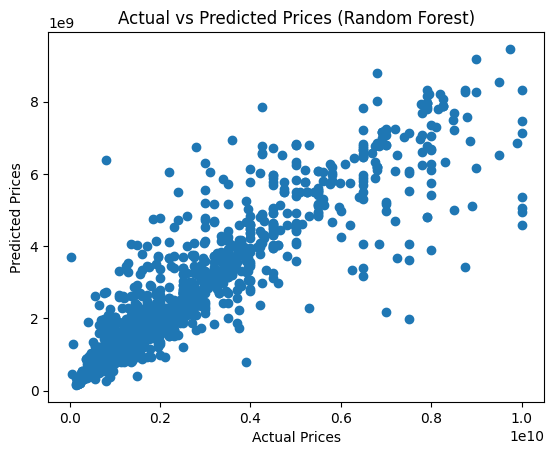

In [96]:
# Plot hasil prediksi (untuk Random Forest)
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.show()

10. Menyimpan Model Terbaik

In [124]:
import pickle

# Menyimpan model ke file .pkl
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Model telah disimpan ke rf_model.pkl")

Model telah disimpan ke rf_model.pkl


In [125]:
# Memuat model dari file .pkl
with open('rf_model.pkl', 'rb') as file:
    model_random_forest_loaded = pickle.load(file)

#prediction
predictions = model_random_forest_loaded.predict(X_test)